#Dogs and Cats Binary Images Classification With Convolutional Network

001048178 Haoyuan Qin

001519701 Zeyuan Zhu

In [ ]:
!pip install pyunpack
!pip install patool
from pyunpack import Archive

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 77 kB 1.1 MB/s 


In [ ]:
Archive('/content/test1.zip').extractall('/content')



In [ ]:
Archive('/content/train.zip').extractall('/content')

In [ ]:
import os, shutil

In [ ]:
current_dir = !pwd  # current
current_dir[0]

'/content'

In [ ]:
base_dir = current_dir[0] + '/cats_dogs_small'
os.mkdir(base_dir)  # create file

In [ ]:
# create train set, validation set and test set

train_dir = os.path.join(base_dir,"train")
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir,"validation")
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir,"test")
os.mkdir(test_dir)

# train, validate and test dir for cats & dogs
train_cats_dir = os.path.join(train_dir, "cats")
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, "dogs")
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, "cats")
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, "dogs")
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, "cats")
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, "dogs")
os.mkdir(test_dogs_dir)

In [ ]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    # origin file
    src = os.path.join(current_dir[0] + "/train", fname)
    # target file
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
# use 500 to valiation

fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(current_dir[0] + "/train", fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
# use 500 to test

fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(current_dir[0] + "/train", fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
# create train, valiation and test to dog's pictures

# 1. use 1000 as train set
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(current_dir[0] + "/train", fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 2. use 500 as valiation set
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(current_dir[0] + "/train", fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 3. use 500 as test set
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(current_dir[0] + "/train", fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

create Network

In [ ]:
import tensorflow as tf
from keras import layers 
from keras import models

model = models.Sequential()
model.add(tf.keras.layers.Conv2D(32,(3,3),activation="relu",
                               input_shape=(150,150,3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(64,(3,3),activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(128,(3,3),activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(128,(3,3),activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))  # 

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:

from tensorflow.keras import optimizers

model.compile(loss="binary_crossentropy",
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=["acc"])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


data pre-process

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)  # rescale
test_datagen = ImageDataGenerator(rescale=1./255)  # rescale

train_generator = train_datagen.flow_from_directory(
    train_dir,  # dir to be deal with
    target_size=(150,150),  # set picture size
    batch_size=20,
    class_mode="binary"  # the loose function is binary_crossentropy so we use "binary"
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,  # dir to be deal with
    target_size=(150,150),  # set picture size
    batch_size=20,
    class_mode="binary"  # the loose function is binary_crossentropy so we use "binary"
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
    print(data_batch.shape)
    print(labels_batch.shape)
    break

(20, 150, 150, 3)
(20,)


module fitting

In [ ]:
history = model.fit_generator(
    train_generator,  # Python generator
    steps_per_epoch=100,  # 2000 / 20
    epochs=30,  # epoch times
    validation_data=validation_generator,  # set needed to be validate
    validation_steps=50 
)


<ipython-input-20-fd648cc6b462>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
100/100 [==============================] - 125s 1s/step - loss: 0.6839 - acc: 0.5450 - val_loss: 0.6557 - val_acc: 0.6010
Epoch 2/30
100/100 [==============================] - 121s 1s/step - loss: 0.6348 - acc: 0.6305 - val_loss: 0.6435 - val_acc: 0.6040
Epoch 3/30
100/100 [==============================] - 127s 1s/step - loss: 0.5897 - acc: 0.6845 - val_loss: 0.6303 - val_acc: 0.6410
Epoch 4/30
100/100 [==============================] - 123s 1s/step - loss: 0.5613 - acc: 0.7070 - val_loss: 0.6079 - val_acc: 0.6690
Epoch 5/30
100/100 [==============================] - 123s 1s/step - loss: 0.5332 - acc: 0.7320 - val_loss: 0.6025 - val_acc: 0.6800
Epoch 6/30
100/100 [==============================] - 123s 1s/step - loss: 0.5054 - acc: 0.7600 - val_loss: 0.5888 - val_acc: 0.6810
Epoch 7/30
100/100 [==============================] - 122s 1s/step - loss: 0.4897 - acc: 0.7555 - val_loss: 0.5670 - val_acc: 0.7010
Epoch 8/30
100/100 [==============================] - 126s 1s/step - 

In [ ]:
# save module
# model.save("cats_and_dogs_small.h5")


Loss and Accuracy Curves

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
history_dict = history.history  # make it to dictionary
for key, _ in history_dict.items():
    print(key)


loss
acc
val_loss
val_acc


In [ ]:
acc = history_dict["acc"]
val_acc = history_dict["val_acc"]

loss = history_dict["loss"]
val_loss = history_dict["val_loss"]


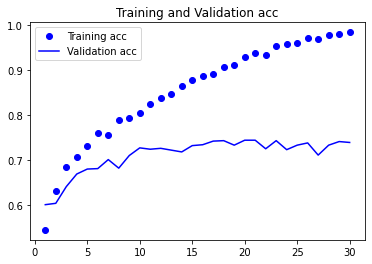

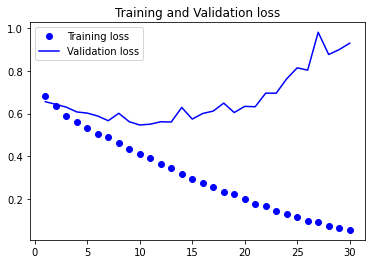

In [ ]:
epochs = range(1, len(acc)+1)

# acc
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and Validation acc")
plt.legend()

plt.figure()

# loss
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and Validation loss")
plt.legend()


data augmentation

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=40,  # angle from 0-180
    width_shift_range=0.2,  # width range
    height_shift_range=0.2,
    shear_range=0.2,  # randomly change angle
    zoom_range=0.2,  # zoom range
    horizontal_flip=True,  # randomly flip half of the pictures
    fill_mode="nearest"  # fill with nearest pixel
)

picture after augmentation

In [ ]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]


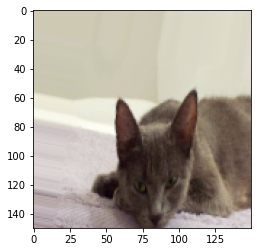

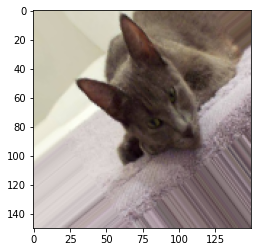

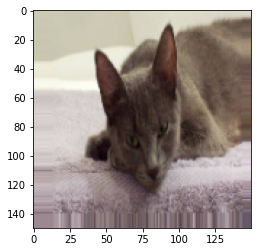

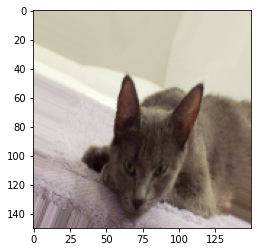

In [ ]:
# read picture and adjust size
img = tf.keras.utils.load_img(img_path, target_size=(150,150))  
# make it to array
x = tf.keras.utils.img_to_array(img)

# turn shape into(1,150,150,3)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):  # make ramdom changed pictures
    plt.figure()   
    imgplot = plt.imshow(tf.keras.utils.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break  
        
plt.show()


New Convolutional Neural Networks Including Dropout Layers

In [ ]:
import tensorflow as tf
from keras import layers 
from keras import models

model = models.Sequential()
model.add(tf.keras.layers.Conv2D(32,(3,3),activation="relu",
                               input_shape=(150,150,3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(64,(3,3),activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(128,(3,3),activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(128,(3,3),activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))  # 

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(512, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy",
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=["acc"])


In [ ]:
# enhance traning data 
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# not to enhance validate data
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,  # target dir
    target_size=(150,150),  # adjust size
    batch_size=32,
    class_mode="binary"
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode="binary"
)

history = model.fit_generator(
    train_generator,
    # steps_per_epoch=100,
    steps_per_epoch=63,  # steps_per_epoch=2000/32≈63
    epochs=100,
    validation_data=validation_generator,
    # validation_steps=50
    validation_steps=32  # validation_steps=1000/32≈32
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


<ipython-input-33-91747ed49c56>:29: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
63/63 [==============================] - 135s 2s/step - loss: 0.6920 - acc: 0.5175 - val_loss: 0.6883 - val_acc: 0.5000
Epoch 2/100
63/63 [==============================] - 131s 2s/step - loss: 0.6814 - acc: 0.5575 - val_loss: 0.6636 - val_acc: 0.5990
Epoch 3/100
63/63 [==============================] - 131s 2s/step - loss: 0.6758 - acc: 0.5605 - val_loss: 0.6604 - val_acc: 0.5830
Epoch 4/100
63/63 [==============================] - 131s 2s/step - loss: 0.6618 - acc: 0.6015 - val_loss: 0.6489 - val_acc: 0.6030
Epoch 5/100
63/63 [==============================] - 128s 2s/step - loss: 0.6460 - acc: 0.6175 - val_loss: 0.6278 - val_acc: 0.6420
Epoch 6/100
63/63 [==============================] - 127s 2s/step - loss: 0.6327 - acc: 0.6325 - val_loss: 0.6073 - val_acc: 0.6600
Epoch 7/100
63/63 [==============================] - 128s 2s/step - loss: 0.6283 - acc: 0.6355 - val_loss: 0.6183 - val_acc: 0.6390
Epoch 8/100
63/63 [==============================] - 130s 2s/step - loss: 0.

In [ ]:
# save module
model.save("cats_and_dogs_small_2.h5")

Loss and Accuracy Curves

In [ ]:
history_dict = history.history  # make it dictionary 

acc = history_dict["acc"]
val_acc = history_dict["val_acc"]
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

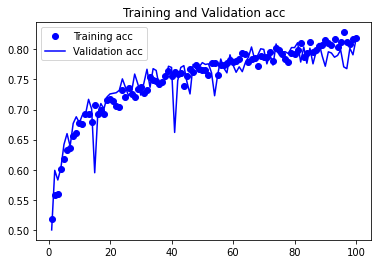

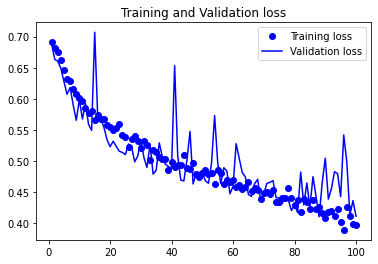

In [ ]:
epochs = range(1, len(acc)+1)

# acc
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and Validation acc")
plt.legend()

plt.figure()

# loss
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and Validation loss")
plt.legend()

plt.show()
